#### Install yfinance

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 23.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Forecasting Stocks from Yahoo Finance with Prophet

In [ ]:
import yfinance as yf

icbp = yf.Ticker("UNVR.JK")

hist = icbp.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-09-03,349.301171,383.379333,343.621477,383.379333,43162500,0.0,0.0
2003-09-04,391.898837,425.976997,383.379297,389.058990,82850000,0.0,0.0
2003-09-05,389.059048,397.578589,386.219201,391.898895,24055000,0.0,0.0
2003-09-08,391.898933,391.898933,377.699696,386.219238,18007500,0.0,0.0
2003-09-09,386.219187,386.219187,374.859799,377.699646,14075000,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-25,3420.000000,3720.000000,3400.000000,3690.000000,53256900,0.0,0.0
2022-04-26,3720.000000,3930.000000,3690.000000,3890.000000,96737500,0.0,0.0
2022-04-27,3890.000000,3900.000000,3770.000000,3810.000000,36437100,0.0,0.0


In [ ]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
4639,2022-04-25,3690.0
4640,2022-04-26,3890.0
4641,2022-04-27,3810.0
4642,2022-04-28,3890.0
4643,2022-05-09,4010.0


In [ ]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [ ]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
5002,2023-05-03,3092.743120,2484.289221,3689.353552
5003,2023-05-04,3089.419014,2426.962001,3703.967941
5004,2023-05-05,3087.773081,2487.831472,3745.375045
5005,2023-05-06,3121.555812,2515.890263,3721.448163
5006,2023-05-07,3123.861836,2488.606992,3754.516878
5007,2023-05-08,3094.903136,2465.991903,3668.252870
5008,2023-05-09,3103.627433,2477.089629,3737.896518


In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.tail()

,ds,yhat,y
5004,2023-05-05,3087.773081,NaN
5005,2023-05-06,3121.555812,NaN
5006,2023-05-07,3123.861836,NaN
5007,2023-05-08,3094.903136,NaN
5008,2023-05-09,3103.627433,NaN


In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
metric_df.tail()

,ds,yhat,y
4639,2022-04-25,4382.672274,3690.0
4640,2022-04-26,4387.258193,3890.0
4641,2022-04-27,4387.790048,3810.0
4642,2022-04-28,4381.973287,3890.0
4643,2022-05-09,4394.192833,4010.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.976426280118894

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

216829.76960965435

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

326.89816344743025

In [ ]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=7a6be813635bc3b383e15bde278c0f5acb3e479d594d55a509e61acd34a7d5c9
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [ ]:
import ml_metrics as metrics

In [ ]:
metrics.mae(metric_df.y, metric_df.yhat)

326.89816344743025

In [ ]:
metrics.ae(metric_df.y, metric_df.yhat)

array([ 69.75683183,  65.87880802,  65.1392751 , ..., 577.79004771,
       491.97328707, 384.19283332])

In [ ]:
metrics.rmse(metric_df.y, metric_df.yhat)

465.64983583123313

## Make it a Function

In [ ]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()
    return df

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-06-08,139.912791,-207.233085,339.560824,139.912791,139.912791,-61.047784,-61.047784,-61.047784,3.292229,3.292229,3.292229,-64.340012,-64.340012,-64.340012,0.0,0.0,0.0,78.865008
1,2004-06-09,140.137416,-187.505492,361.478459,140.137416,140.137416,-57.578039,-57.578039,-57.578039,7.655097,7.655097,7.655097,-65.233136,-65.233136,-65.233136,0.0,0.0,0.0,82.559377
2,2004-06-10,140.362042,-157.670928,361.552906,140.362042,140.362042,-57.704054,-57.704054,-57.704054,8.832874,8.832874,8.832874,-66.536927,-66.536927,-66.536927,0.0,0.0,0.0,82.657988
3,2004-06-11,140.586667,-194.727047,368.125825,140.586667,140.586667,-59.569452,-59.569452,-59.569452,8.667073,8.667073,8.667073,-68.236524,-68.236524,-68.236524,0.0,0.0,0.0,81.017215
4,2004-06-14,141.260543,-201.251785,345.119973,141.260543,141.260543,-72.158329,-72.158329,-72.158329,3.251788,3.251788,3.251788,-75.410117,-75.410117,-75.410117,0.0,0.0,0.0,69.102214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,2025-01-18,9338.977459,8693.012030,10097.301725,8656.184398,9944.693136,82.911770,82.911770,82.911770,-15.849525,-15.849525,-15.849525,98.761294,98.761294,98.761294,0.0,0.0,0.0,9421.889228
5441,2025-01-19,9340.995124,8659.957285,10104.290083,8656.302124,9947.503517,82.956094,82.956094,82.956094,-15.849536,-15.849536,-15.849536,98.805630,98.805630,98.805630,0.0,0.0,0.0,9423.951219
5442,2025-01-20,9343.012790,8704.308352,10113.892603,8656.682418,9950.313899,101.917285,101.917285,101.917285,3.251788,3.251788,3.251788,98.665497,98.665497,98.665497,0.0,0.0,0.0,9444.930075
5443,2025-01-21,9345.030456,8719.575640,10076.703055,8657.751989,9953.124280,101.651833,101.651833,101.651833,3.292229,3.292229,3.292229,98.359604,98.359604,98.359604,0.0,0.0,0.0,9446.682288


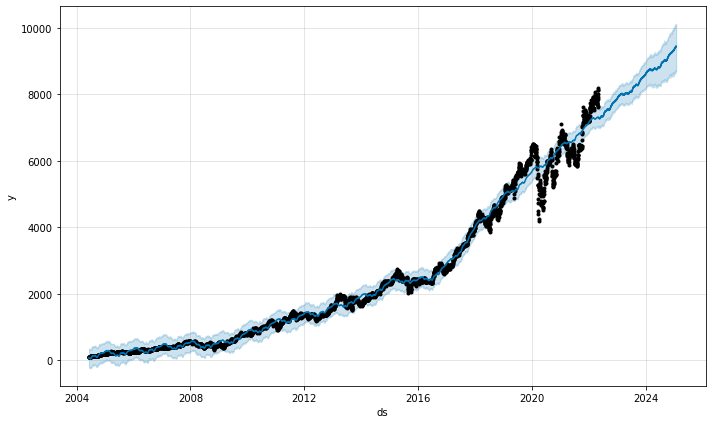

In [ ]:
#BBCA data
make_forecast('BBCA.JK', 1000)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6129,2024-04-23,9396.880585,8404.019357,10148.441026,8927.235831,9857.807657,-141.927546,-141.927546,-141.927546,-6.803493,-6.803493,-6.803493,-135.124053,-135.124053,-135.124053,0.0,0.0,0.0,9254.953039
6130,2024-04-24,9397.175437,8348.276706,10171.410673,8926.473135,9859.170083,-136.005289,-136.005289,-136.005289,-5.791100,-5.791100,-5.791100,-130.214189,-130.214189,-130.214189,0.0,0.0,0.0,9261.170148
6131,2024-04-25,9397.470290,8380.787017,10120.450586,8925.759858,9860.532510,-126.231579,-126.231579,-126.231579,-1.053243,-1.053243,-1.053243,-125.178337,-125.178337,-125.178337,0.0,0.0,0.0,9271.238711
6132,2024-04-26,9397.765142,8474.748741,10143.388920,8925.105297,9861.894936,-121.000163,-121.000163,-121.000163,-0.959313,-0.959313,-0.959313,-120.040851,-120.040851,-120.040851,0.0,0.0,0.0,9276.764979
6133,2024-04-27,9398.059994,8443.589939,10198.696332,8924.303047,9863.257363,-104.920990,-104.920990,-104.920990,9.906450,9.906450,9.906450,-114.827440,-114.827440,-114.827440,0.0,0.0,0.0,9293.139005


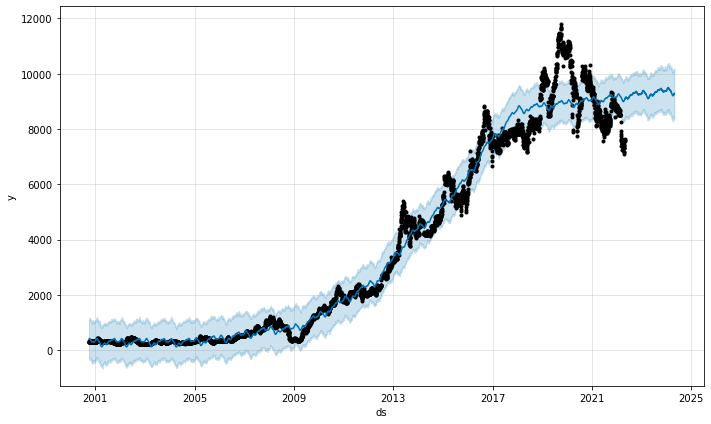

In [ ]:
# ICBP Data
make_forecast('ICBP.JK', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
4643,2022-04-29,4384.875236,3790.525680,4979.196574
4644,2022-04-30,4414.998949,3808.205380,4981.711283
4645,2022-05-01,4415.692461,3817.597532,5002.878250
4646,2022-05-02,4387.519101,3764.979826,5026.033234
4647,2022-05-03,4395.010652,3813.357255,4979.371216
...,...,...,...,...
5003,2023-04-24,3098.586463,2455.226414,3726.362249
5004,2023-04-25,3102.466173,2508.860236,3778.326537
5005,2023-04-26,3102.591509,2456.505688,3721.142663
5006,2023-04-27,3096.398222,2487.100444,3719.797350


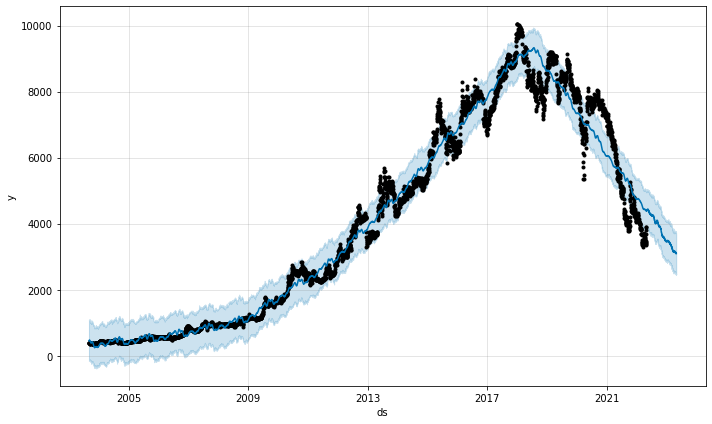

In [ ]:
n = 365  # set variable for number of days to predict

# unilever
UNVR_forecast = make_forecast('UNVR.JK', n)

# only keep the future forecast, and forget most columns
UNVR_forecast = UNVR_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

UNVR_forecast

NameError: ignored